# Use of convolutions with tensorflow

In this notebook, you'll be using tensorflow to build a Convolutional Neural Network (CNN).  

### Convolution

Both, [this notebook](https://nbviewer.jupyter.org/github/marc-moreaux/Deep-Learning-classes/blob/master/notebooks/Convolution.ipynb) and this [wikipedia page](https://en.wikipedia.org/wiki/Convolution) might help you understand what is a convolution.

no, if we consider two functions $f$ and $g$ taking values from $\mathbb{Z} \to \mathbb{R}$ then:  
$ (f * g)[n] = \sum_{m = -\infty}^{+\infty} f[m] \cdot g[n - m] $

In our case, we consider the two vectors $x$ and $w$ :  
$ x = (x_1, x_2, ..., x_{n-1}, x_n) $  
$ w = (w_1, w_2) $

And get :   
$ x * w = (w_1 x_1 + w_2 x_2, w_1 x_2 + w_2 x_3, ..., w_1 x_{n-1} + w_2 x_n)$


#### Deep learning subtility :
    
In most of deep learning framewoks, you'll get to chose in between three paddings:
- **Same**: $(f*g)$ has the same shape as x (we pad the entry with zeros)
- **valid**: $(f*g)$ has the shape of x minus the shape of w plus 1 (no padding on x)
- **Causal**: $(f*g)(n_t)$ does not depend on any $(n_{t+1})$

### Tensorflow

"TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks.[3] It is used for both research and production at Google often replacing its closed-source predecessor, DistBelief." - Wikipedia

We'll be using tensorflow to build the models we want to use. 

Here below, we build a AND gate with a very simple neural network :

In [2]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# Define our Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1]).reshape(-1,1)

# Define the tensorflow tensors
x = tf.placeholder(tf.float32, [None, 2], name='X')  # inputs
y = tf.placeholder(tf.float32, [None, 1], name='Y')  # outputs
W = tf.Variable(tf.zeros([2, 1]), name='W')
b = tf.Variable(tf.zeros([1,]), name='b')

# Define the model
pred = tf.nn.sigmoid(tf.matmul(x, W) + b)  # Model

# Define the loss
with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1-y) * tf.log(1-pred), reduction_indices=1))
    loss_summary = tf.summary.scalar('loss', loss)

# Define the optimizer method you want to use
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Include some Tensorboard visualization
writer = tf.summary.FileWriter("./and/")

# Start training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
    
    for epoch in range(10000):
        _, c, p, ls = sess.run([optimizer, loss, pred, loss_summary], feed_dict={x: X,
                                                      y: Y})
        writer.add_summary(ls, epoch)
print (p, y)

[[  1.25129800e-05]
 [  2.02729534e-02]
 [  2.02729534e-02]
 [  9.71605659e-01]] Tensor("Y:0", shape=(?, 1), dtype=float32)


To visualize the graph you just created, launch tensorbord.  
`$tensorboard --logdirs=./` on linux (with corresponding logdir)

---
### Get inspiration from the preceding code to build a XOR gate

Design a neural network with 2 layers.
- layer1 has 2 neurons (sigmoid or tanh activation)
- Layer2 has 1 neuron (it outouts the prediction)

And train  it

It's **mandatory** that you get a **tensorboard visualization** of your graph, try to make it look good, plz :)

Here below I put a graph of the model you want to have (yet your weights won't be the same)
![graph](https://i.stack.imgur.com/nRZ6z.png)

In [1]:
import tensorflow as tf
import numpy as np
import random 

tf.reset_default_graph()

# Define our Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0]).reshape(-1,1)
 
input_node=1
hidden_node=2
output_node=1
 
# Define the tensorflow tensors
x = tf.placeholder(tf.float32, [None, 2], name='X')  # inputs
y = tf.placeholder(tf.float32, [None, 1], name='Y')  # outputs
W1 = tf.Variable(tf.random_normal([2, 2]), name='W1')
W2 = tf.Variable(tf.random_normal([2, 1]), name='W2')
b1 = tf.Variable(tf.random_normal([2,]), name='b1')
b2= tf.Variable(tf.random_normal([1,]), name='b2')

print("W1 : {}\nb1 : {}\nW2 : {}\nb2 : {}".format(W1, b1, W2, b2))

# Define the model
first_pred = tf.nn.tanh(tf.matmul(x, W1) + b1)  # Model
pred = tf.nn.sigmoid(tf.matmul(first_pred, W2) + b2)  # Model
 
# Define the loss
with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1-y) * tf.log(1-pred), reduction_indices=1))
    loss_summary=tf.summary.scalar('loss',loss)
    
# Define the optimizer method you want to use
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(0.3).minimize(loss)
    
# Include some Tensorboard visualization
writer = tf.summary.FileWriter("./xor/")
 
    
# Start training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
   
    for epoch in range(1000):
        _, c, p,ls,test = sess.run([optimizer, loss, pred,loss_summary,x], feed_dict={x: X,
                                                      y: Y})
        writer.add_summary(ls,epoch)
    W1,b1,W2,b2=sess.run([W1,b1,W2,b2])
print (p, y)
print(p.shape)

W1 : <tf.Variable 'W1:0' shape=(2, 2) dtype=float32_ref>
b1 : <tf.Variable 'b1:0' shape=(2,) dtype=float32_ref>
W2 : <tf.Variable 'W2:0' shape=(2, 1) dtype=float32_ref>
b2 : <tf.Variable 'b2:0' shape=(1,) dtype=float32_ref>
[[ 0.01806771]
 [ 0.98962128]
 [ 0.98960018]
 [ 0.01988306]] Tensor("Y:0", shape=(?, 1), dtype=float32)
(4, 1)


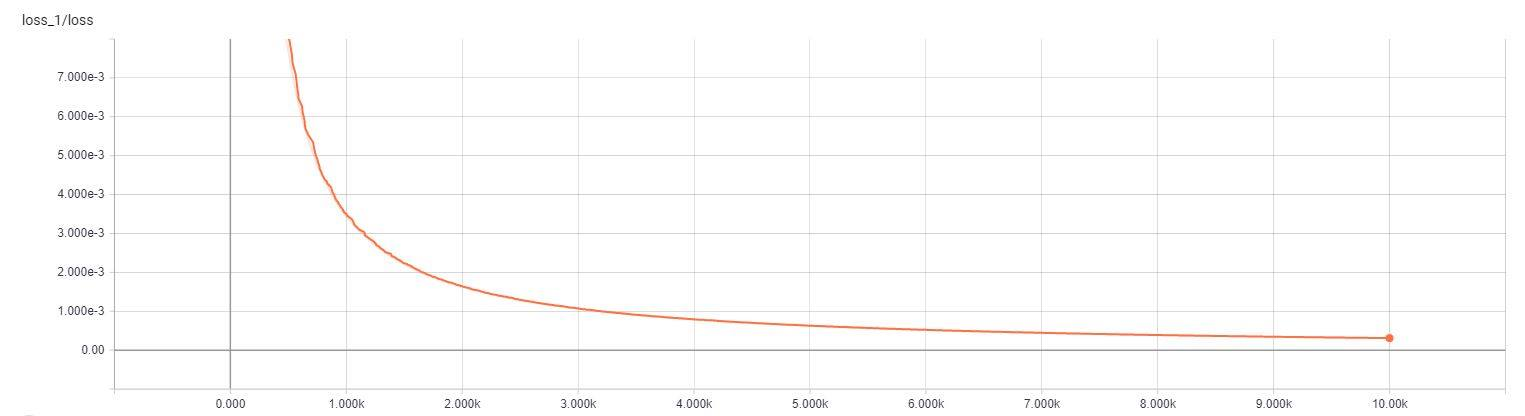

In [1]:
from IPython.display import Image
Image(filename='img/loss.jpg') 

#We can see that the loss is decreasing while we are increasing the number of iterations. It means that our model learns 
#well and gets better accuracy

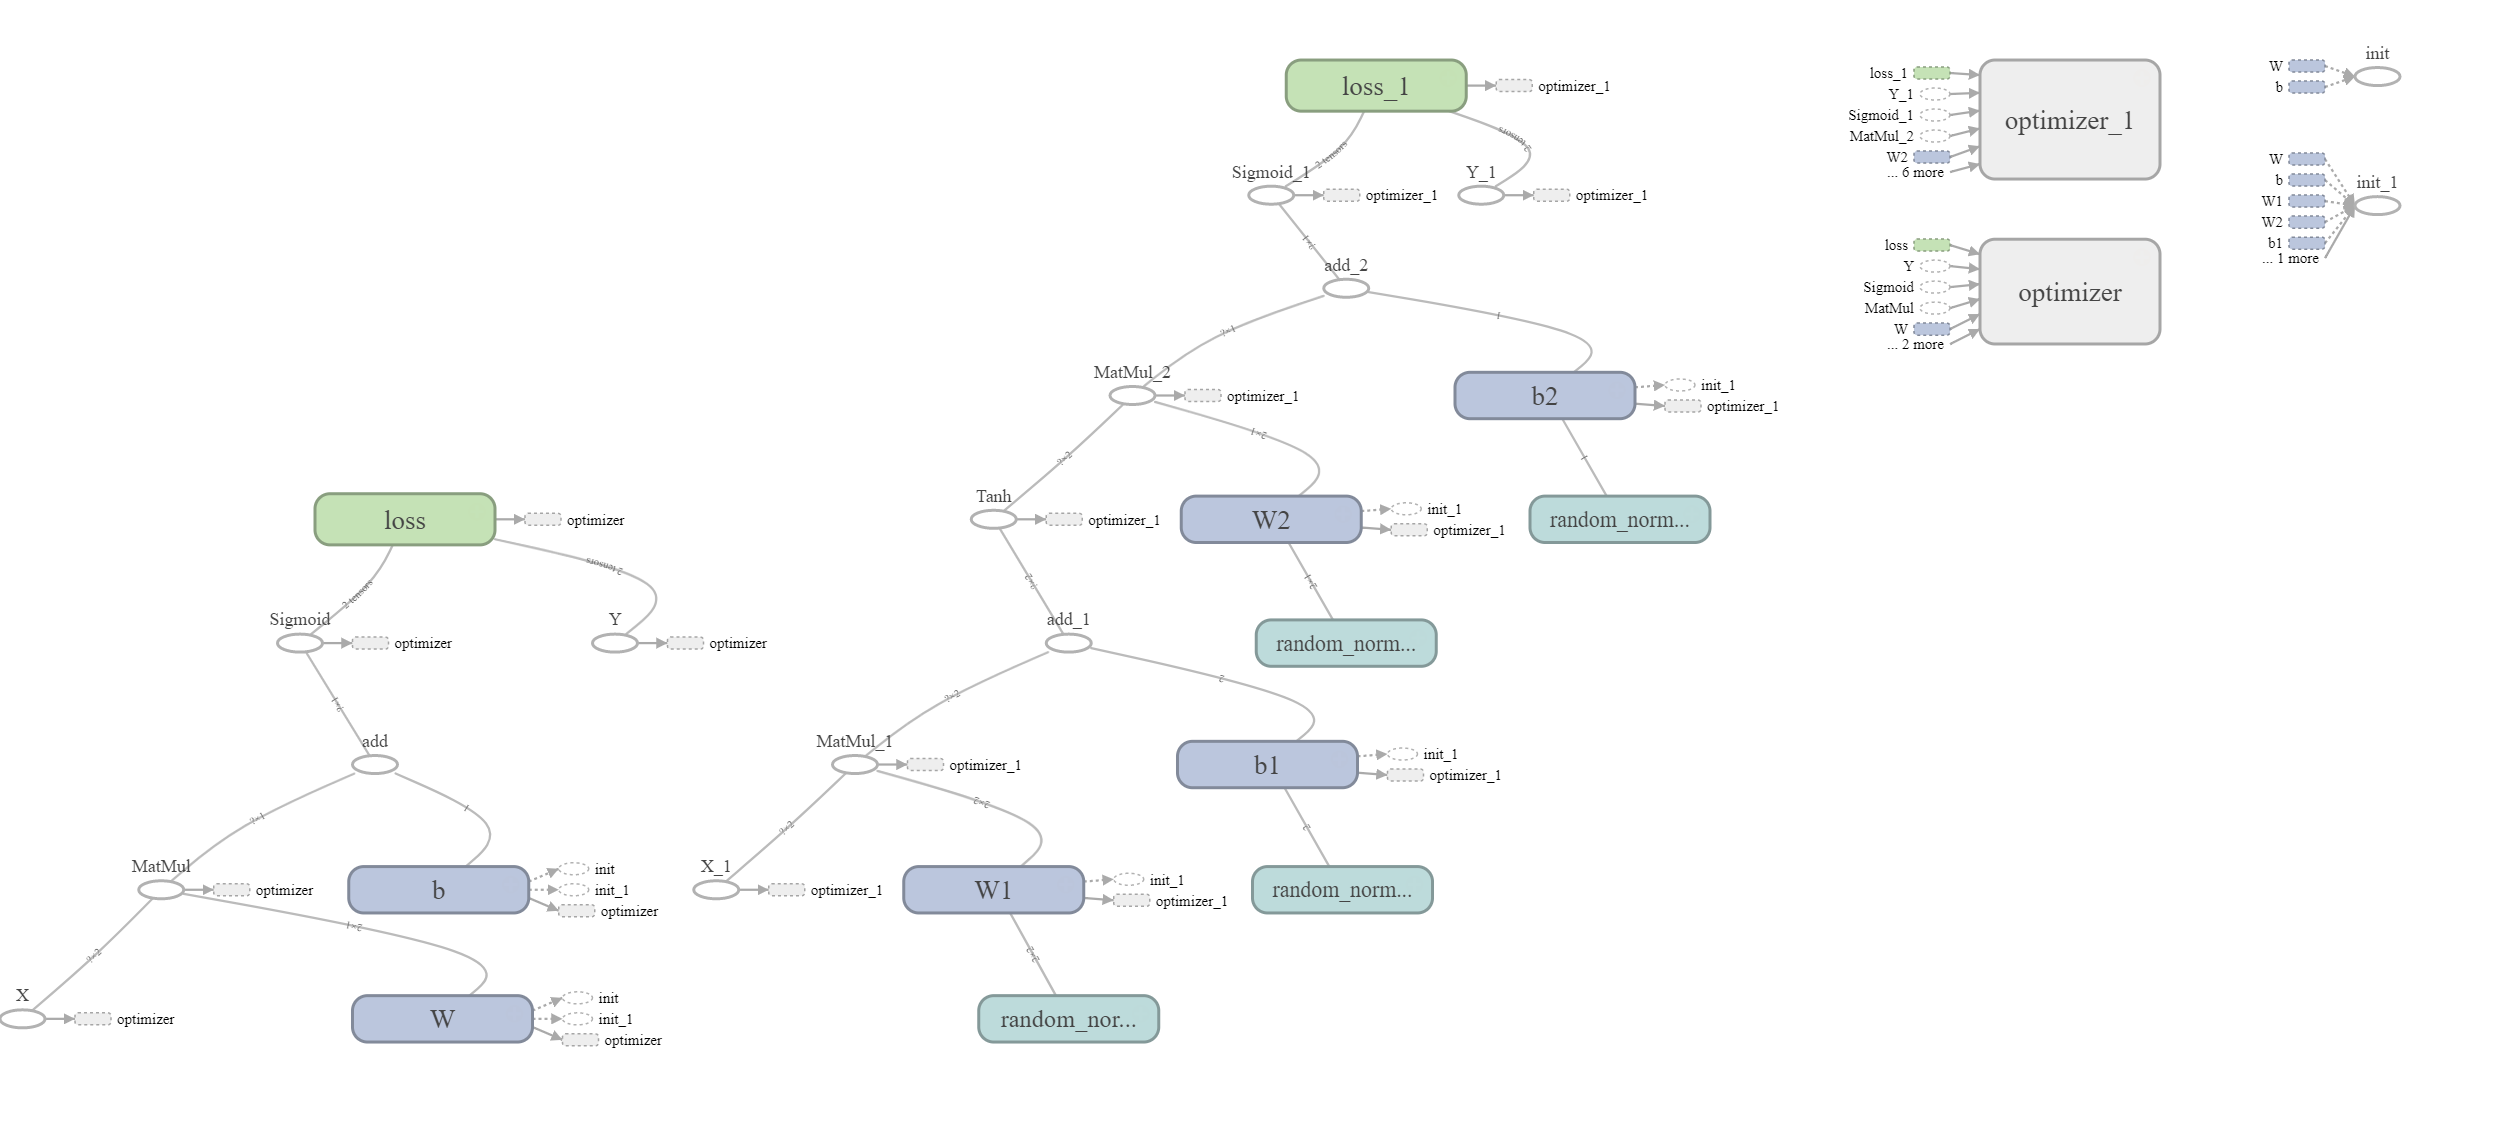

In [4]:
from IPython.display import Image
Image(filename='img/graph.png') 

#Here is our tensorflow graph






### Print the weights of your model
And give an interpretation on what they are doing

#### Interpretation
The weights of our model are actually seperating the inputs into 2 categories (1 or 0)

In [5]:
### Code here
print("W1 : {}\nb1 : {}\nW2 : {}\nb2 : {}".format(W1, b1, W2, b2))

W1 : [[ 3.47720218 -2.94311571]
 [-3.3696661   2.74693918]]
b1 : [-1.75826836 -1.27648616]
W2 : [[ 4.39332151]
 [ 4.45647097]]
b2 : [ 3.87264323]


---
### Build a CNN to predict the MNIST digits
You can now move to CNNs. You'll have to train a convolutional neural network to predict the digits from MNIST.

You might want to reuse some pieces of code from [SNN](https://nbviewer.jupyter.org/github/marc-moreaux/Deep-Learning-classes/blob/master/notebooks/Intro_to_SNN.ipynb)

Your model should have 3 layers:
- 1st layer : 6 convolutional kernels with shape (3,3)
- 2nd layer : 6 convolutional kernels with shape (3,3)
- 3rd layer : Softmax layer

Train your model.

Explain all you do, and why, make it lovely to read, plz o:)

### EXPLANATIONS:
Note that we have divided the code into sections so the structure of the explanations will be easier to read.

#### Step 1: 
In this step, we actually define some functions that will help us to calculate our weights, our bias, our conv and our pool


#### Step2:
In this step, we just define our input and output. Our input has shape of 784 because it is the dimensionality of a single flattened 28 by 28 pixel MNIST image.
Concerning the output y, it is a 2d tensor, where each row is a one-hot 10-dimensional vector indicating which digit class (zero through nine) the corresponding MNIST image belongs to.

Then we define our NN. The number of layers is imposed by you.
Your model should have 3 layers:
- 1st layer : 6 convolutional kernels with shape (3,3). Moreover, the weight is 6D as discussed in class, so it is not surprising to see W of conv1 with dimensions [3,3,1,6]. We have 6 layers, so the biais is dimension 6. Then, we are calculating the convolution of layer 1 using the images and weight + bias.
- 2nd layer : 6 convolutional kernels with shape (3,3). It is pretty much the same as the 1st step, but the shape of the layer 2 is different (6 instead of 1 because it depends on the first layer that is 6D)
- 3rd layer : Softmax layer in order to get real values in the range [0, 1] that add up to 1. It computes our probabilities

#### Step 3
In this part, we are defining the loss, the optimizer and the accuracy

- Loss: Loss indicates how bad the model's prediction was on a single example; we try to minimize that while training across all the examples. Here, our loss function is the cross-entropy between the target and the softmax activation function applied to the model's prediction
- Optimizer: Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
- Accuracy: The percentage of misclassification is calculated. We use tensorflow functions such as tf.equal to check is the predicted value is the correct value...

#### Step 4
We are just writing in a file contained in the folder "Bouchaib_Ziegelmeyer" our summary (loss and accuracy)

#### Step 5
The step 5 is probably the most interesting one.

First of all, we initialize the Variables that uses our session.
Then we train our model: We load 100 training examples in each training iteration. We then run the train_step operation, using feed_dict to replace the placeholder tensors x and y with the training examples.

For each 100th iteration, we display the accuracy



### Conlusion
Using all these steps, we are able to predict the value of the digits with an accuracy of 91%.
However, this accuracy is not very good when we talk about deep learning, we can improve it using more filters.





In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
sess = tf.InteractiveSession()

############# STEP 1 #######################

def weight_variable(shape):
    initial = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

############# STEP 2 #######################

x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

#Layer 1
x_digits = tf.reshape(x, [-1, 28, 28, 1])
W_conv1 = weight_variable([3, 3, 1, 6])
b_conv1 = bias_variable([6])
h_conv1 = conv2d(x_digits, W_conv1) + b_conv1
h_pool1 = max_pool_2x2(h_conv1)

#Layer 2
W_conv2 = weight_variable([3, 3, 6, 6])
b_conv2 = bias_variable([6])
h_conv2 = conv2d(h_conv1, W_conv2) + b_conv2
h_pool2 = max_pool_2x2(h_conv2)

#Layer 3
h_3 = tf.contrib.layers.flatten(h_conv2)
logits = tf.layers.dense(h_3, 10)
y_conv = tf.nn.softmax(logits)


############# STEP 3 #######################
#Loss
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
    loss_summary=tf.summary.scalar('loss',loss)

with tf.name_scope("optimizer"):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

    
############# STEP 4 #######################

# Print the logs for Tensorboard
writer_train = tf.summary.FileWriter("./Bouchaib_Ziegelmeyer/")
    

############# STEP 5 #######################
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer_train.add_graph(sess.graph)
    i=0
    for epoch in range(1000):
        batch = mnist.train.next_batch(100) #on prend 100 samples pour notre training
        train_step.run(feed_dict={x: batch[0], y: batch[1]}) #we run the training using feed_dict to replace the placeholder tensors x and y with the training examples.
        if epoch % 100 == 0:
            print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    W1_,b1_,W2_,b2_=sess.run([W_conv1,b_conv1,W_conv2,b_conv2])


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
test accuracy 0.0973
test accuracy 0.3922
test accuracy 0.6638
test accuracy 0.797
test accuracy 0.8192
test accuracy 0.8745
test accuracy 0.8919
test accuracy 0.8988
test accuracy 0.9023
test accuracy 0.9069


### Print the weights of your model
And give an interpretation on what they are doing

#### Answer
The weights are actually representing the output of the layers. After some training we should begin to see patterns that resemble numbers from the dataset.

Basically, for each pixel, we can for example color the lowest weigth is blanc and the highest in white. It should allow us to see the color shade that build our digit


In [21]:
### code here
print("W1 : {}\nb1 : {}\nW2 : {}\nb2 : {}".format(W1_, b1_, W2_, b2_))

W1 : [[[[ 0.07057314 -0.02423079  0.21252804  0.14706002  0.33705881 -0.03438383]]

  [[ 0.18403213 -0.28438243  0.08855893 -0.04778066 -0.04009325 -0.13643727]]

  [[ 0.10641511 -0.08389113  0.17013645 -0.04156407  0.16807011 -0.10344805]]]


 [[[ 0.03351362 -0.01793282  0.089262    0.06823786 -0.06287194 -0.10832974]]

  [[ 0.13364063 -0.04331559  0.16775921  0.26471549  0.12018268 -0.05662877]]

  [[ 0.08959732 -0.10075396 -0.06412417  0.01860728  0.11688843 -0.06076626]]]


 [[[ 0.09100293 -0.04249162  0.10734454  0.19716676  0.16454966 -0.09680745]]

  [[-0.15632157 -0.19675922  0.0282266  -0.09277977 -0.02149259  0.04706571]]

  [[ 0.14168988  0.04198852  0.07182677  0.11454739  0.02094125 -0.03186847]]]]
b1 : [ 0.08766277  0.11104123  0.08779753  0.08613611  0.08821329  0.1103961 ]
W2 : [[[[-0.04822485  0.13695797  0.19067475 -0.04572792  0.0224033  -0.11714829]
   [ 0.08228948 -0.17612031 -0.23330908  0.20828569 -0.04773032  0.17858171]
   [ 0.04205258  0.12127116  0.05289576  

### Chose one (tell me what you chose...)
- Show how the gradients (show only one kernel) evolve for good and wrong prediction. (hard)
- Initialize the kernels with values that make sense for you and show how they evolve. (easy) 
- When training is finished, show the 6+6=12 results of some convolved immages. (easy)